Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

In [1]:
!pip install pandas matplotlib numpy


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Plotting

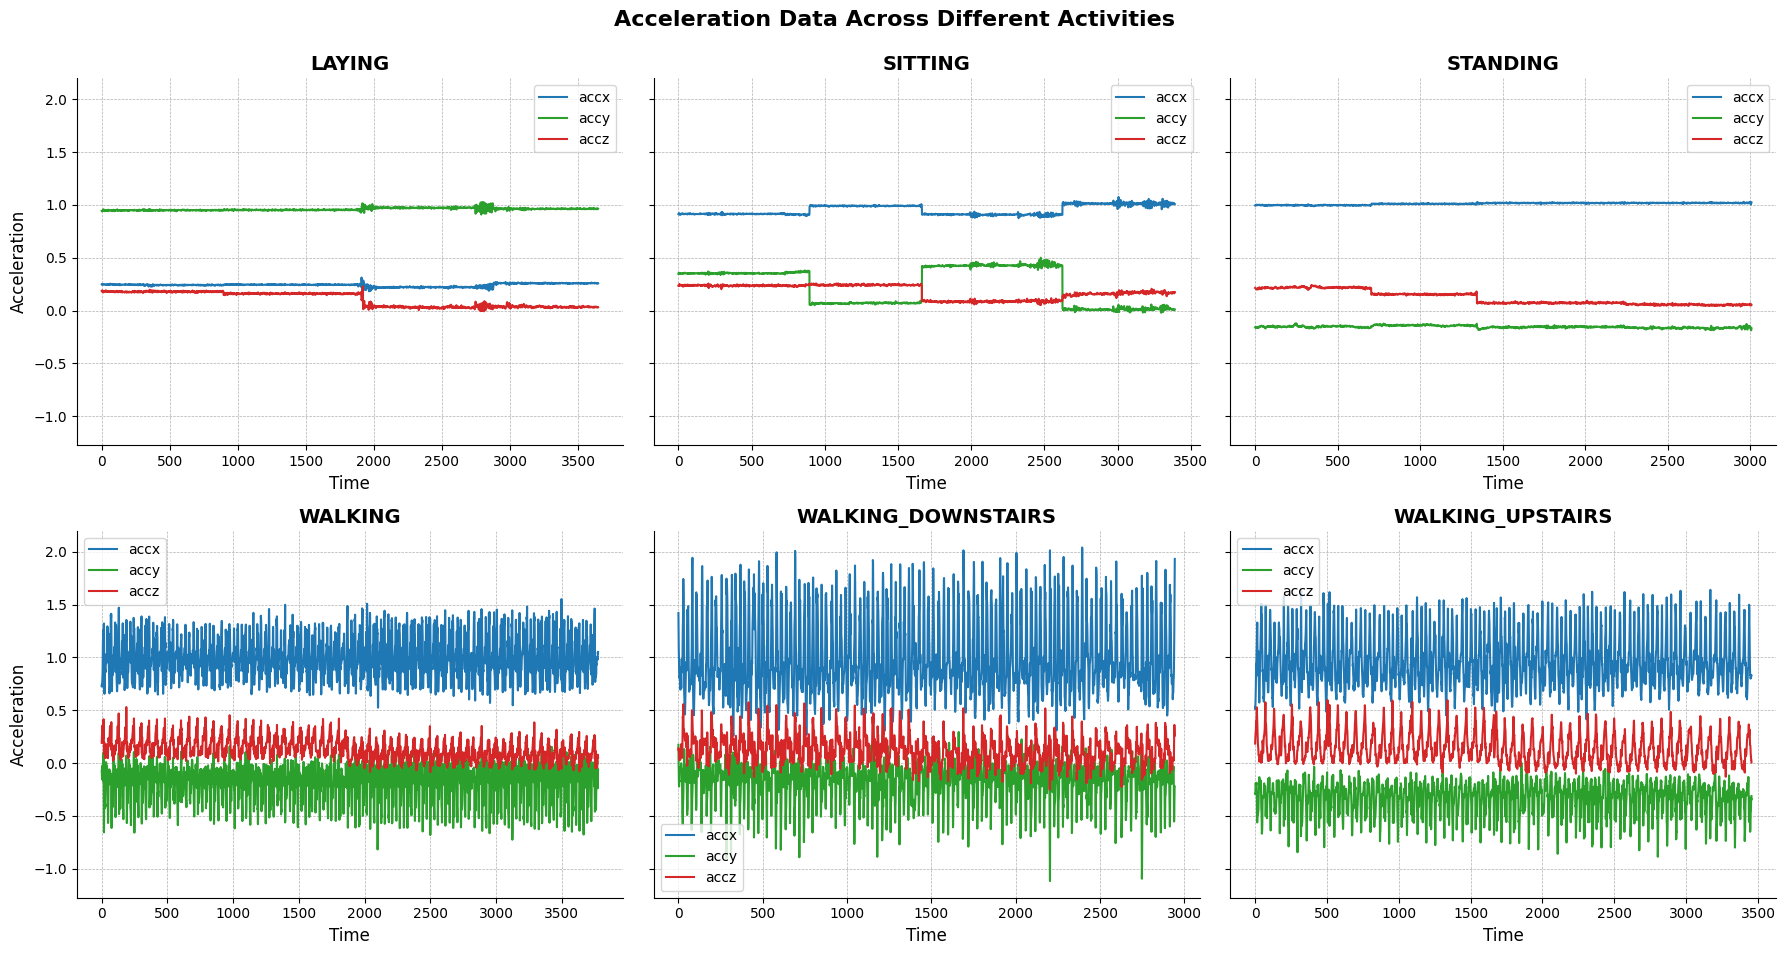

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Path to the data directories
test_path = 'Combined/Train'  # Update with the correct path
# Define activity classes and corresponding folders
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

columns = ['accx', 'accy', 'accz']

# Set a color palette
colors = ['#1f77b4', '#2ca02c', '#d62728']  # Blue, Green, Red

# Create a subplot with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, activity in enumerate(activities):
    # Get one sample file from each activity class
    activity_path = os.path.join(test_path, activity)
    sample_file = os.listdir(activity_path)[1]  # Select the first file
    sample_data = pd.read_csv(os.path.join(activity_path, sample_file))

    # Plot the waveform for accx, accy, accz
    axes[i].plot(sample_data['accx'], label='accx', color=colors[0], linewidth=1.5)
    axes[i].plot(sample_data['accy'], label='accy', color=colors[1], linewidth=1.5)
    axes[i].plot(sample_data['accz'], label='accz', color=colors[2], linewidth=1.5)
    
    # Set titles and labels
    axes[i].set_title(activity, fontsize=14, weight='bold')
    axes[i].set_xlabel('Time', fontsize=12)
    if i % 3 == 0:  # Only label y-axis on the leftmost plots
        axes[i].set_ylabel('Acceleration', fontsize=12)
    
    # Add grid lines
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add legend
    axes[i].legend(fontsize=10)
    
    # Remove spines for a cleaner look
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Improve the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Acceleration Data Across Different Activities', fontsize=16, weight='bold')

plt.show()

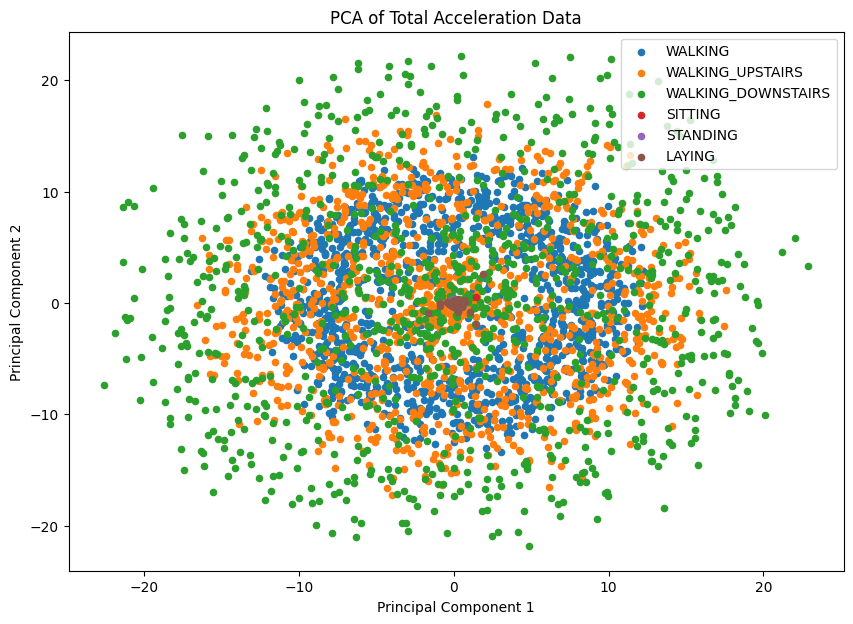

PCA-transformed data saved to total_acc_pca.txt


In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Paths to the files
acc_x_path = 'HAR/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt'
acc_y_path = 'HAR/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt'
acc_z_path = 'HAR/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt'
y_train_path = 'HAR/UCI HAR Dataset/train/y_train.txt'

# Load the data
acc_x = np.loadtxt(acc_x_path).astype(float)
acc_y = np.loadtxt(acc_y_path).astype(float)
acc_z = np.loadtxt(acc_z_path).astype(float)
y_train = np.loadtxt(y_train_path).astype(int)

# Calculate the total acceleration
total_acc = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)

# Standardize the data
scaler = StandardScaler()
total_acc_scaled = scaler.fit_transform(total_acc)

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
total_acc_pca = pca.fit_transform(total_acc_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=total_acc_pca, columns=['PC1', 'PC2'])
df_pca['Activity'] = y_train

# Define activity labels
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

# Map the activity numbers to labels
df_pca['Activity_Label'] = df_pca['Activity'].map(activity_labels)

# Plotting the scatter plot
plt.figure(figsize=(10, 7))
for label, activity in activity_labels.items():
    indices = df_pca['Activity'] == label
    plt.scatter(df_pca.loc[indices, 'PC1'], 
                df_pca.loc[indices, 'PC2'], 
                label=activity, s=20)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Total Acceleration Data')
plt.legend()
plt.show()
output_path = 'total_acc_pca.txt'
np.savetxt(output_path, total_acc_pca, delimiter=',')
print(f"PCA-transformed data saved to {output_path}")

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the feature data
X_train_tsfel = pd.read_csv('X_train_tsfel.csv')

# Load the activity labels (assuming the labels are stored in a CSV file too)
y_train = pd.read_csv('HAR/UCI HAR Dataset/train/y_train.txt').values.flatten()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_tsfel)
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Plot the two principal components with activity labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of HAR Dataset')
plt.colorbar(scatter, label='Activity Label')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'HAR/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt'